In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
data = pd.read_csv("Traffic_Accident_2017.csv", encoding="euc-kr")

In [59]:
#pandas -> .head()
data.head(3)

발생년      발생년월일시  발생분  주야 요일  사망자수  사상자수  중상자수  경상자수  부상신고자수  ... 도로형태_대분류  \
0  2017  2017010101   15  야간  일     1     2     1     0       0  ...      단일로   
1  2017  2017010102   28  야간  일     1     1     0     0       0  ...      교차로   
2  2017  2017010102   43  야간  일     1     2     0     1       0  ...      단일로   

    도로형태 당사자종별_1당_대분류 당사자종별_1당 당사자종별_2당_대분류 당사자종별_2당 발생위치X_UTMK 발생위치Y_UTMK  \
0  기타단일로          승용차      승용차          승용차      승용차     933501    1700129   
1  교차로부근          승용차      승용차          보행자      보행자     967570    1944453   
2  기타단일로          승용차      승용차          승용차      승용차     916497    1842880   

           경도         위도  
0  126.768634  35.294464  
1  127.133107  37.498741  
2  126.566631  36.580069  

[3 rows x 27 columns]

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4065 entries, 0 to 4064
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   발생년           4065 non-null   int64  
 1   발생년월일시        4065 non-null   int64  
 2   발생분           4065 non-null   int64  
 3   주야            4065 non-null   object 
 4   요일            4065 non-null   object 
 5   사망자수          4065 non-null   int64  
 6   사상자수          4065 non-null   int64  
 7   중상자수          4065 non-null   int64  
 8   경상자수          4065 non-null   int64  
 9   부상신고자수        4065 non-null   int64  
 10  발생지시도         4065 non-null   object 
 11  발생지시군구        4065 non-null   object 
 12  사고유형_대분류      4065 non-null   object 
 13  사고유형_중분류      4065 non-null   object 
 14  사고유형          4065 non-null   object 
 15  법규위반_대분류      4065 non-null   object 
 16  법규위반          4065 non-null   object 
 17  도로형태_대분류      4065 non-null   object 
 18  도로형태          4065 non-null 

In [35]:
#요일에 따른 교통사고 건수 확인하기
y=data['요일'].value_counts()
#print(y)
yo=['일','월','화','수','목','금','토']
#인덱스를 원하는 방법으로 수정하는 방법
#y에 덥어쓰기 형태로 넣어주어서 정렬을 진행한다.
y=y[yo]
y

일    504
월    603
화    608
수    565
목    586
금    603
토    596
Name: 요일, dtype: int64

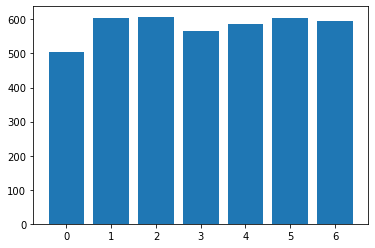

In [36]:
#막대 그래프 그리기
#bar 그래프는 line 그래프와 달리 항목을 문자열로 구성된 리스트를 넣는게 아니라
#0부터 시작하는 정수 리스트로 만들어서 넣어 주어야 한다.
x=np.arange(7)
plt.bar(x, y)
plt.show()

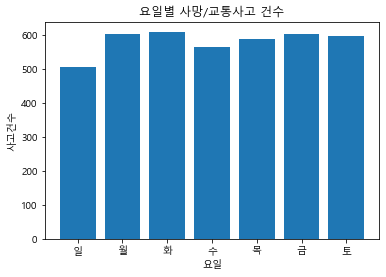

In [58]:
#차트에서 한글의 가져 오지 못함
#한글 불러오는 코드
from matplotlib import font_manager,rc
font_name=font_manager.FontProperties(fname="c:/windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

y=data['요일'].value_counts()
yo=['일','월','화','수','목','금','토']
y=y[yo]
x=np.arange(7)
plt.bar(x,y)
plt.xticks(x, yo)

# 축 이름을 삽입할 때는 -> xlable / ylabel 
plt.xlabel("요일")
plt.ylabel("사고건수")
plt.title("요일별 사망/교통사고 건수")
plt.show()

In [65]:
#차대차 (사고유형_대분류) 사건중 죽거나 다친사람이 많은 발생지 시도 찾아보기
carToCar=data[data['사고유형_대분류']=='차대차']
carToCar.head(3)

발생년      발생년월일시  발생분  주야 요일  사망자수  사상자수  중상자수  경상자수  부상신고자수  ... 도로형태_대분류  \
0  2017  2017010101   15  야간  일     1     2     1     0       0  ...      단일로   
2  2017  2017010102   43  야간  일     1     2     0     1       0  ...      단일로   
8  2017  2017010118   33  야간  일     1     3     1     1       0  ...      단일로   

    도로형태 당사자종별_1당_대분류 당사자종별_1당 당사자종별_2당_대분류 당사자종별_2당 발생위치X_UTMK 발생위치Y_UTMK  \
0  기타단일로          승용차      승용차          승용차      승용차     933501    1700129   
2  기타단일로          승용차      승용차          승용차      승용차     916497    1842880   
8  기타단일로          승용차      승용차          화물차      화물차     922514    1476665   

           경도         위도  
0  126.768634  35.294464  
2  126.566631  36.580069  
8  126.667913  33.278582  

[3 rows x 27 columns]

In [68]:
#차대차 중에서 사사자 수와 '발생지시도' 추출하기
result=carToCar[['사상자수', '발생지시도']].groupby('발생지시도').sum()
result

사상자수
발생지시도      
강원      214
경기      824
경남      248
경북      287
광주       87
대구      115
대전       61
부산      107
서울      197
세종       17
울산       73
인천       66
전남      298
전북      244
제주       50
충남      351
충북      261

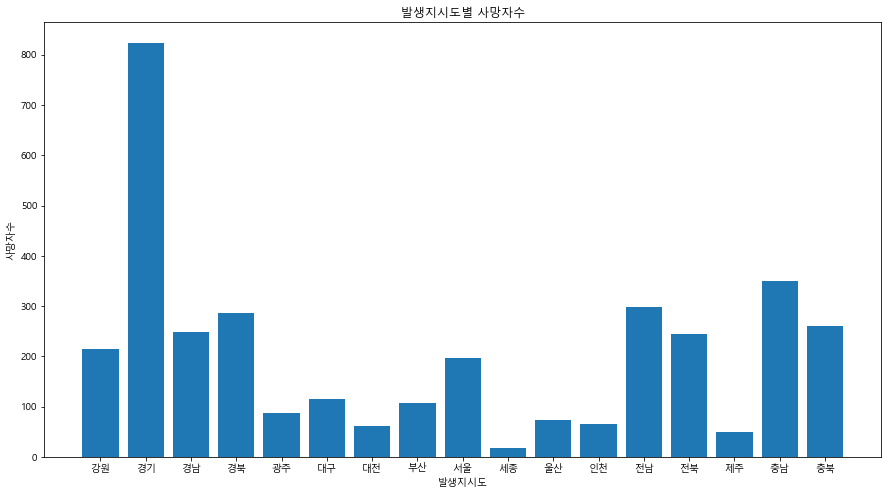

In [108]:
#result 중에서 '발생지시도' -> x
#'사상자 수'->y

yList=[]
yLabel=result.values
#2차원 배열의 값을 하나씩 리스트에 담아준다.
for i in range(len(y)) :
    yList.append(yLabel[i][0])

#x축의 인덱스를 구함
xLabel=result.index
#x축의 값의 개수를 구함
x=np.arange(len(xLabel))

#그래프의 영역 지정하기 -> figure(figsize=(가로,세로))
plt.figure(figsize=(15,8))

#그래프를 그려줌
plt.bar(x,yList)
#그래프의 x축에 발생시도 대입
plt.xticks(x, xLabel)

plt.xlabel("발생지시도")
plt.ylabel("사망자수")
plt.title("발생지시도별 사망자수")

plt.show()

In [109]:
#교통사고가 가장 많이 발생하는 시간대 pie 차트로 그려보기
#구간 : 0-2, 3-5, 6-8, 9-11, 12-14, 15-17, 18-20, 21-23

#데이터에서 발생년월일시 가져오기
time=data['발생년월일시']
time

0       2017010101
1       2017010102
2       2017010102
3       2017010102
4       2017010104
           ...    
4060    2017123118
4061    2017123118
4062    2017123119
4063    2017123120
4064    2017123123
Name: 발생년월일시, Length: 4065, dtype: int64

In [111]:
#시간만 가져오기 위한 연산 작업 진행하기 time%100
time=time%100
time

0        1
1        2
2        2
3        2
4        4
        ..
4060    18
4061    18
4062    19
4063    20
4064    23
Name: 발생년월일시, Length: 4065, dtype: int64

In [121]:
#구간별 데이터 정리하기 위한 함수 -> cut()
#pd.cut(data, bins, labels)
#구간 : 0-2, 3-5, 6-8, 9-11, 12-14, 15-17, 18-20, 21-23
bins=[-1,2,5,8,11,14,17,20,23]

#영역 구간리스트 설정
lb=['0-2', '3-5', '6-8', '9-11', '12-14', '15-17', '18-20', '21-23']

result=pd.cut(time,bins,labels=lb)
result

0         0-2
1         0-2
2         0-2
3         0-2
4         3-5
        ...  
4060    18-20
4061    18-20
4062    18-20
4063    18-20
4064    21-23
Name: 발생년월일시, Length: 4065, dtype: category
Categories (8, object): ['0-2' < '3-5' < '6-8' < '9-11' < '12-14' < '15-17' < '18-20' < '21-23']

In [118]:
#각각 범위의 개수
rs=result.value_counts()
rs

18-20    692
15-17    550
9-11     526
21-23    494
12-14    472
6-8      466
3-5      444
0-2      421
Name: 발생년월일시, dtype: int64

In [124]:
#pie 차트 표현

#그래프의 영역 지정하기 -> figure(figsize=(가로,세로))
plt.figure(figsize=(15,8))

#pie(데이터, 라벨명, %보이기)
plt.pie(rs, labels=lb, autopct='%1.1f%%')
plt.show()